In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config
set_config(transform_output="pandas")

In [2]:
# ID of the Google Sheet for student food preferences
sheet_id = "1zsxedf5S4xSxfbrudc12rH0MMlcxJVSPn7soZcTNUfk"

# Title of the Google Sheet, which is the number after "gid" in the url.
sheet_name = "1050069865"

# URL to download the Google Sheet as a CSV
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"
#https://docs.google.com/spreadsheets/d/1zsxedf5S4xSxfbrudc12rH0MMlcxJVSPn7soZcTNUfk/edit?usp=sharing
# Create a Pandas DataFrame from the CSV data
moosic5000_df = pd.read_csv(url,
                       index_col=["name","id", "artist"])

# Dropping artist, id and html as we cant get the average from here.
to_drop = ['type', 'duration_ms', 'html']
moosic5000_df = moosic5000_df.drop(columns=to_drop)

# First get the columns with PCA after standard scaling

In [3]:
moosic5000_df = moosic5000_df.loc[:, ~moosic5000_df.columns.str.contains('^Unnamed')]

In [4]:
# Create a StandardScaler object
scaler = StandardScaler()    #.set_output(transform="pandas")

# Scale the foods_df DataFrame
moosic5000_df_standard = scaler.fit_transform(moosic5000_df)

In [5]:
moosic5000_df_standard

,,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
name,id,artist,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,0.681116,-1.368556,1.608851,-0.604187,-1.351545,-0.178099,1.134867,-0.694125,5.285610,-0.495488,-0.292147,0.230889
Saudade De Bahia,5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,1.066401,-0.882963,-0.911297,-0.525544,0.739894,-0.682409,-0.205206,-0.694278,-0.524470,0.898109,0.221160,0.230889
"Canta Canta, Minha Gente",0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,1.566355,0.265117,-0.911297,-0.271661,0.739894,3.706071,0.457807,-0.694112,-0.410678,1.661526,-0.875994,0.230889
Mulher Eu Sei,3mXqOdlLE1k67WsAxryPFs,Chico César,0.896692,-2.092782,-0.351264,-1.394432,0.739894,-0.506814,1.654602,-0.694174,1.343056,0.289535,-0.417262,0.230889
Rosa Morena,7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,0.649009,-1.854148,0.208769,-1.663249,0.739894,-0.634647,1.758549,-0.693358,-0.544551,-0.149790,0.077701,0.230889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,-1.410434,-2.026187,-0.631281,-2.232499,0.739894,-0.504004,1.761359,1.234756,-0.683779,-1.361535,-1.078754,0.230889
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,-1.474648,-1.916582,0.208769,-1.991485,0.739894,-0.547552,1.587177,0.455047,-0.776151,-1.469566,-1.245808,0.230889
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,-2.063584,-2.263676,1.048818,-5.341527,0.739894,-0.558790,1.856877,1.920037,-0.723941,-1.473527,-1.650523,-2.148453


In [6]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(moosic5000_df_standard)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(moosic5000_df_standard)

pca_basic_df

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11
name,id,artist,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,-0.536436,0.628056,-2.606546,4.025767,3.369533,0.933555,-0.648257,0.011327,-0.564932,0.720892,-0.216246,-0.161035
Saudade De Bahia,5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,0.133745,1.806926,1.222024,-0.350469,-0.018438,0.123340,-0.092034,-0.082420,0.092130,0.250262,-0.816739,-0.276770
"Canta Canta, Minha Gente",0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,1.500225,1.265629,0.586060,1.151651,-1.556608,-2.113226,-1.553754,2.463174,0.932746,-0.350411,-0.023781,0.515794
Mulher Eu Sei,3mXqOdlLE1k67WsAxryPFs,Chico César,-1.707749,2.371758,0.446242,1.623807,1.024045,0.343673,-0.374081,0.587883,-0.324802,0.358709,-0.339786,-0.105320
Rosa Morena,7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,-2.104924,2.243708,0.272265,-0.130194,0.235004,0.461318,0.019672,1.000677,-0.666209,0.287286,-0.355172,0.304191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,-4.270538,0.210196,0.699178,0.449572,-0.971164,0.505707,-0.175040,0.332722,-0.266541,-0.166956,-0.146737,-0.103960
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,-3.847062,0.306348,0.144262,0.403267,-0.941882,0.493670,0.516626,0.589733,-0.884318,-0.346585,-0.247374,-0.110733
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,-6.911752,-0.174971,-0.530709,0.184698,-0.043542,-0.908939,1.082903,0.952604,0.790542,-0.716108,-2.024679,0.883308


In [7]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_

explained_variance_array

array([0.27528732, 0.15650837, 0.09717066, 0.08100971, 0.07977691,
       0.0742098 , 0.07141352, 0.06916051, 0.04303306, 0.02489399,
       0.01982768, 0.00770847])

### **Getting PCA only with cumulative explained variance**

In [8]:
cumulative_sum_of_variance = np.cumsum(explained_variance_array)

cumulative_sum_of_variance

array([0.27528732, 0.43179569, 0.52896636, 0.60997607, 0.68975298,
       0.76396278, 0.8353763 , 0.90453681, 0.94756986, 0.97246385,
       0.99229153, 1.        ])

In [9]:
# Create a PCA object
pca_variance = PCA(n_components = 0.94)

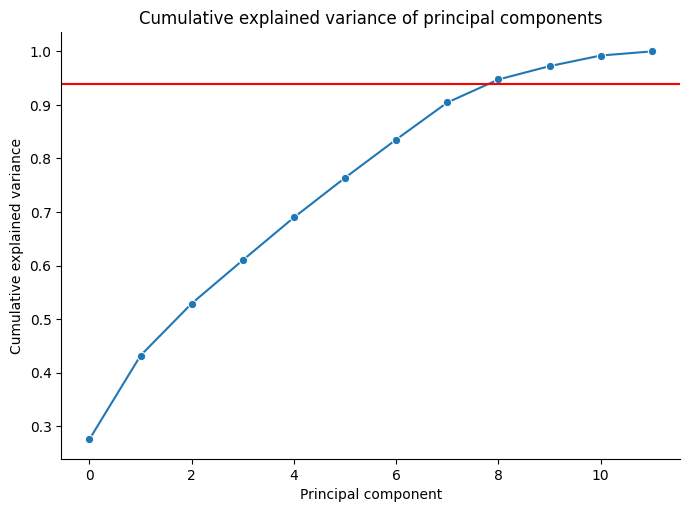

In [10]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title="Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.94,
            color = 'red');

In [11]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df_standard = pca_variance.fit_transform(moosic5000_df_standard)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df_standard

,,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
name,id,artist,,,,,,,,,
Se Eu Quiser Falar Com Deus,1n7JnwviZ7zf0LR1tcGFq7,Gilberto Gil,-0.536436,0.628056,-2.606546,4.025767,3.369533,0.933555,-0.648257,0.011327,-0.564932
Saudade De Bahia,5QGM1U0eCYrQuwSJwTm5Zq,Antônio Carlos Jobim,0.133745,1.806926,1.222024,-0.350469,-0.018438,0.123340,-0.092034,-0.082420,0.092130
"Canta Canta, Minha Gente",0NLIFSZxPzQhCwnkn5PJYs,Martinho Da Vila,1.500225,1.265629,0.586060,1.151651,-1.556608,-2.113226,-1.553754,2.463174,0.932746
Mulher Eu Sei,3mXqOdlLE1k67WsAxryPFs,Chico César,-1.707749,2.371758,0.446242,1.623807,1.024045,0.343673,-0.374081,0.587883,-0.324802
Rosa Morena,7bSzjzjTkWT2CkIPPdp0eA,Kurt Elling,-2.104924,2.243708,0.272265,-0.130194,0.235004,0.461318,0.019672,1.000677,-0.666209
...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1aEhYlZtypmipA06SDJ4U3,Pyotr Ilyich Tchaikovsky,-4.270538,0.210196,0.699178,0.449572,-0.971164,0.505707,-0.175040,0.332722,-0.266541
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",1Gfqe7TAKklmuZf6hxsH6h,Tristan Murail,-3.847062,0.306348,0.144262,0.403267,-0.941882,0.493670,0.516626,0.589733,-0.884318
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",2XNwnFrdMDpismp0VUZ7cU,Arnold Schoenberg,-6.911752,-0.174971,-0.530709,0.184698,-0.043542,-0.908939,1.082903,0.952604,0.790542


# Now apply clusters

## Estimate the number of clusters

## 1. Inertia and elbow method

In [20]:
# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k = 40

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for k in range(25, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = k,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(pca_variance_df_standard)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

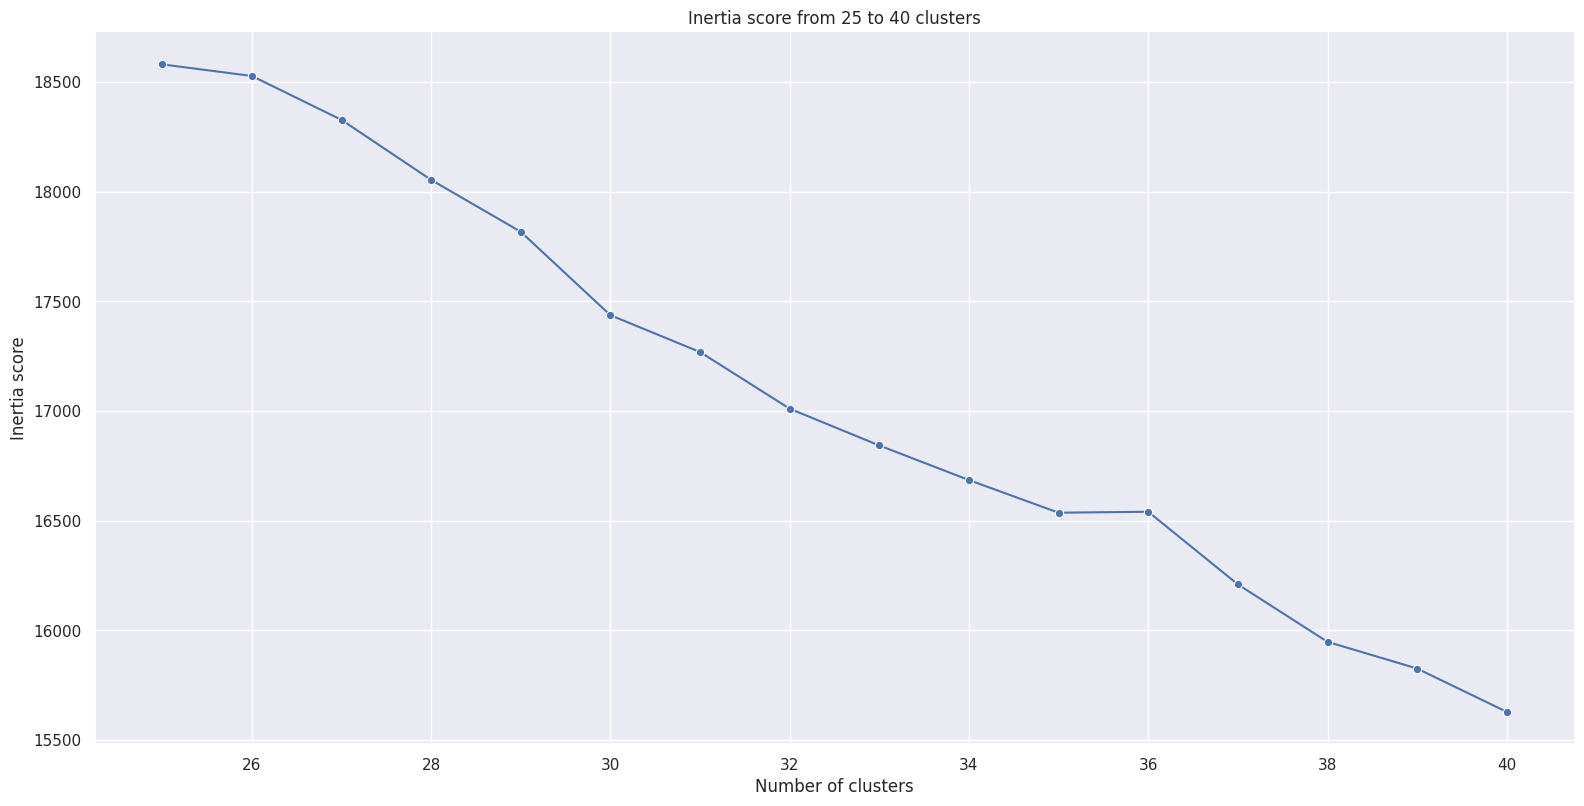

In [32]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(25, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 25 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);



In my opinion k=30 or 36 here.

## 2. The Silhoutte score

In [25]:
# Set the maximum number of clusters to try
max_k = 40

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(25, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(pca_variance_df_standard)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(pca_variance_df_standard, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

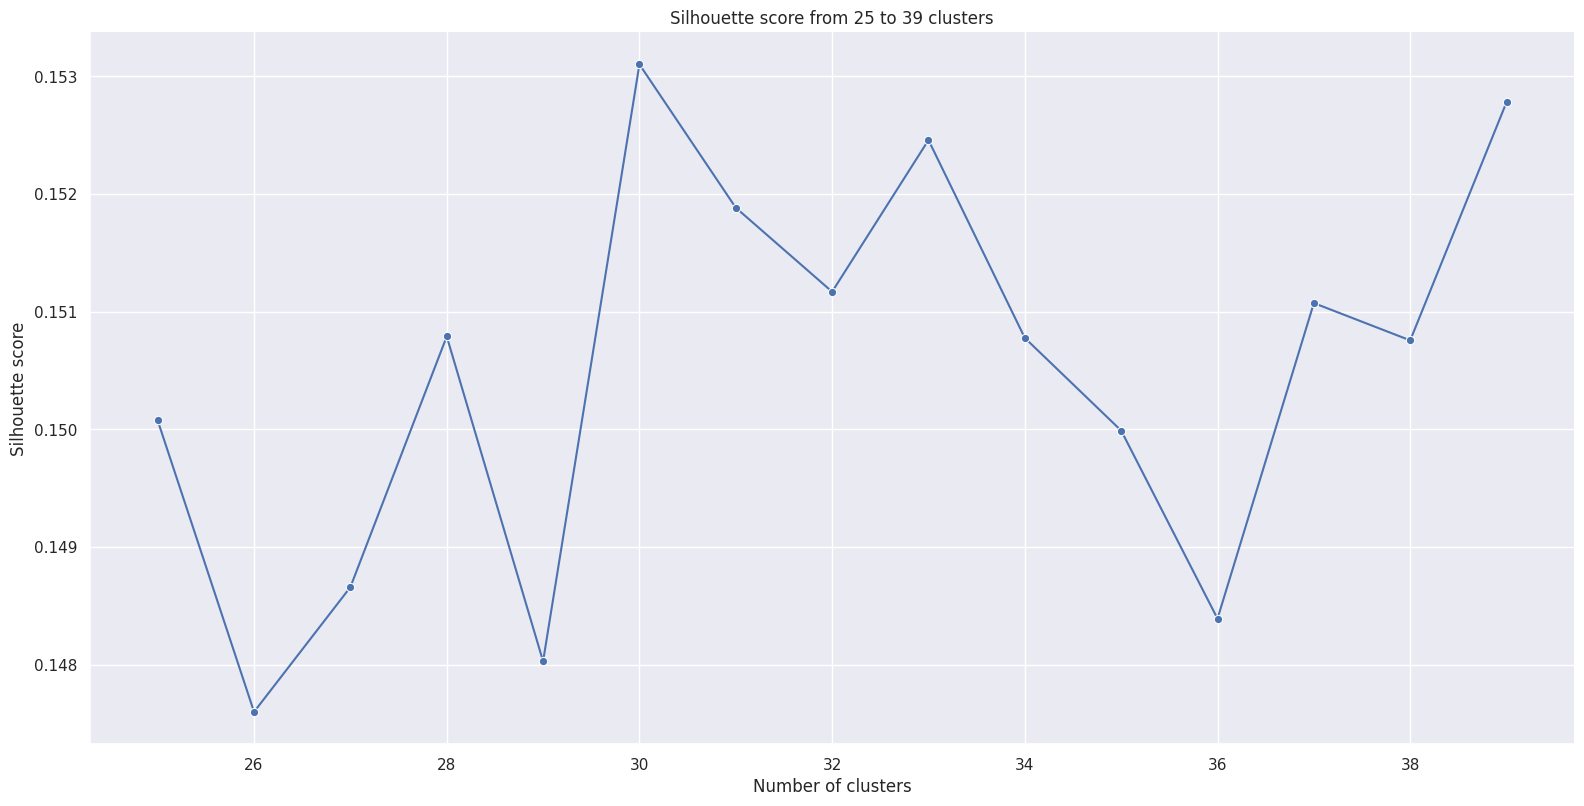

In [33]:
(
sns.relplot(y = sil_scores,
            x = range(25, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 25 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

The highest point is at 30 for me. So 30 clusters

In [28]:
from sklearn.metrics import silhouette_score

score = silhouette_score(pca_variance_df_standard, labels)
print(f"Silhouette Score: {score:.4f}")  # Should usually be between -1.0 and 1.0

Silhouette Score: 0.1528


# Asign cluster labels to Data frame

In [29]:
from sklearn.cluster import KMeans

# Let's say you have PCA-reduced features in `pca_df`
kmeans = KMeans(n_clusters=30, random_state=123)
pca_variance_df_standard['cluster'] = kmeans.fit_predict(pca_variance_df_standard)

In [30]:
moosic5000_df_standard['cluster'] = kmeans.labels_

## **Scatterplot of all the songs in each cluster**

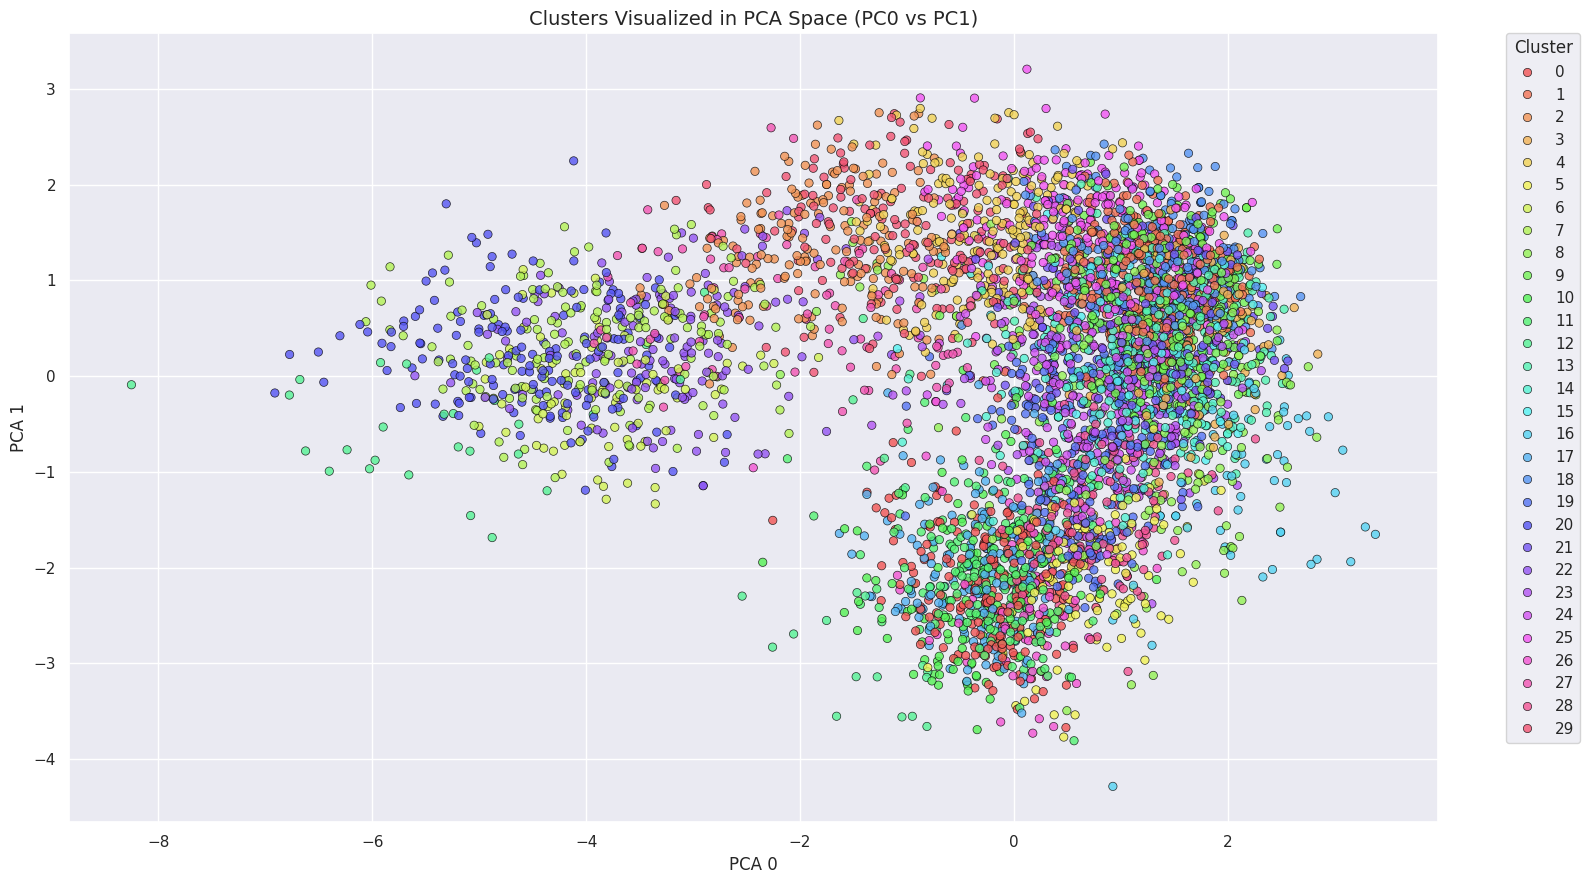

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys

# Generate 34 visually distinct colors using HSV space
def get_distinct_colors(n):
    hues = [i / n for i in range(n)]
    return [colorsys.hsv_to_rgb(h, 0.65, 0.95) for h in hues]

palette_30_distinct = get_distinct_colors(30)

plt.figure(figsize=(16, 9))
sns.scatterplot(
    data=pca_variance_df_standard,
    x='pca0',
    y='pca1',
    hue='cluster',
    palette=palette_30_distinct,
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)
plt.title('Clusters Visualized in PCA Space (PC0 vs PC1)', fontsize=14)
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True)
plt.tight_layout()
plt.show()
